In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
data = pd.read_csv('C:/Users/UJJAWAL/OneDrive/Desktop/Assignments/creditcard.csv')

In [8]:
data_info = data.info() 
data_description = data.describe()

data_description,data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(                Time            V1            V2            V3            V4  \
 count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
 std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
 min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
 25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
 50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
 75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
 max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   
 
                  V5            V6            V7            V8            V9  \
 count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
 std    1.380247e+00  1.33227

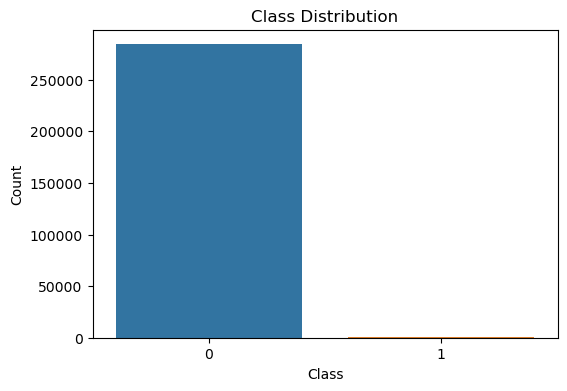

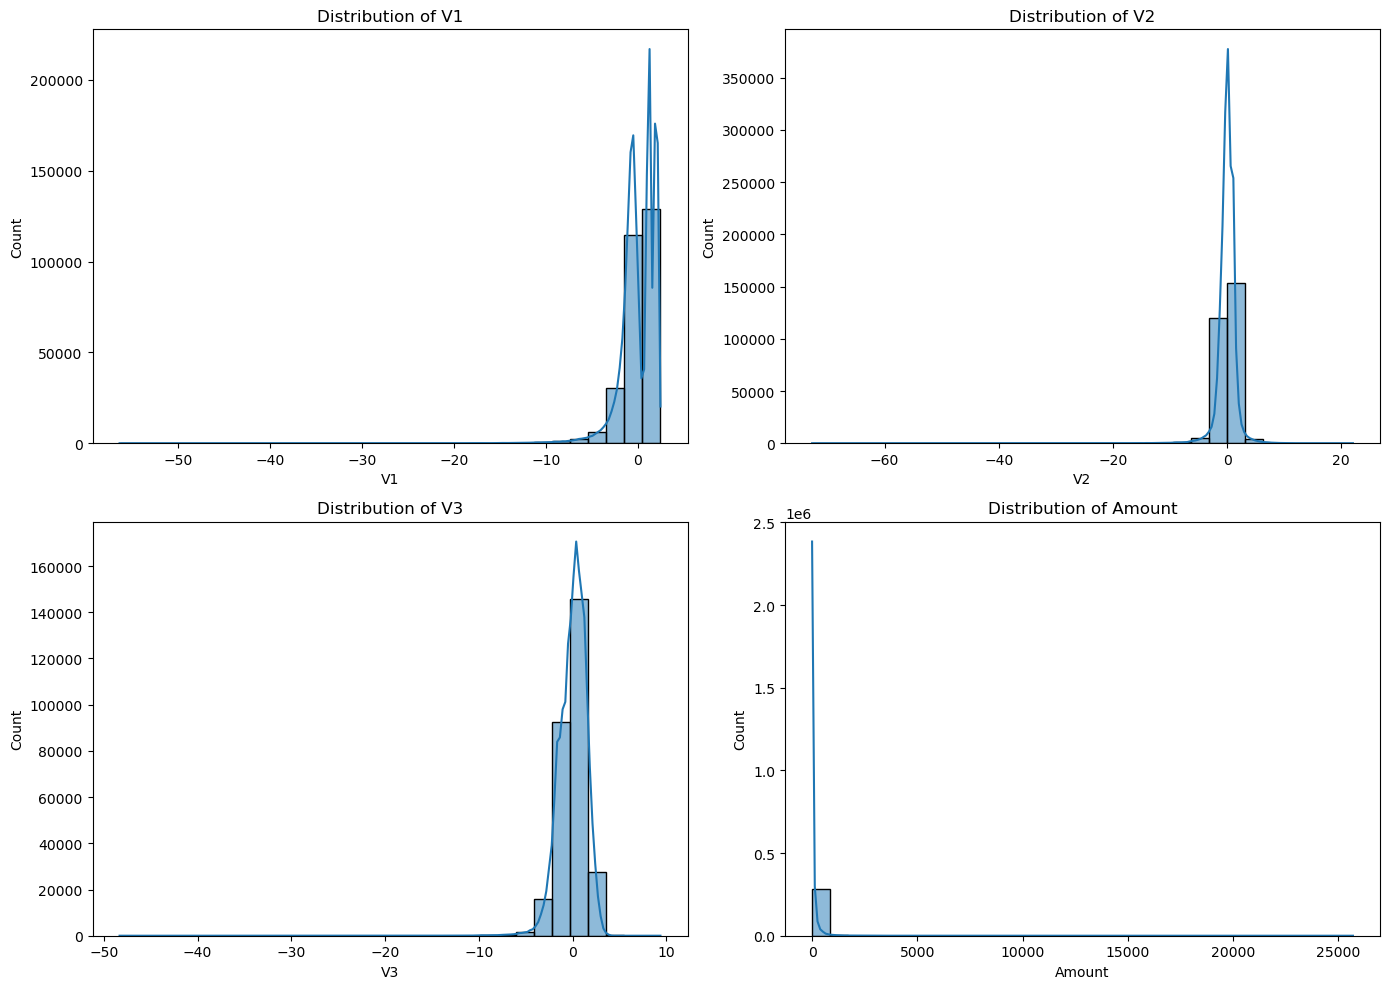

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


features_to_plot = ['V1', 'V2', 'V3', 'Amount']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [12]:

missing_values = data.isnull().sum()

# Scale the features (excluding 'Time' and 'Class')
scaler = StandardScaler()
features_to_scale = data.columns.drop(['Time', 'Class'])
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

missing_values, data.head()

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
 1   0.0  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
 2   1.0 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
 3   1.0 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
 4   2.0 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.0

In [13]:
# Split the data into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

log_reg, decision_tree, random_forest

C:\Users\UJJAWAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(LogisticRegression(random_state=42),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42))